### SVM classification on any dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=91)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
from sklearn.svm import SVC

In [10]:
model_lin = SVC(kernel='linear')
model_lin.fit(X_train_scaled,y_train)
model_lin.score(X_test_scaled,y_test)

0.8043478260869565

In [11]:
model_poly = SVC(kernel='poly')
model_poly.fit(X_train_scaled,y_train)
model_poly.score(X_test_scaled,y_test)

0.8913043478260869

In [12]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_scaled,y_train)
model_rbf.score(X_test_scaled,y_test)

0.8913043478260869

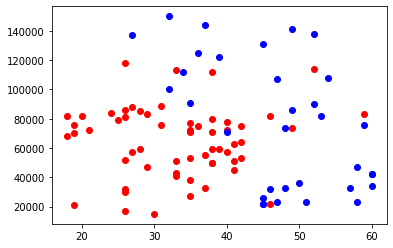

In [13]:
#Actual data
class_0_act = X_test[y_test==0]
class_1_act = X_test[y_test==1]
plt.scatter(class_0_act['Age'],class_0_act['EstimatedSalary'],c='red')
plt.scatter(class_1_act['Age'],class_1_act['EstimatedSalary'],c='blue')

Text(0.5, 1.0, 'Linear Kernel')

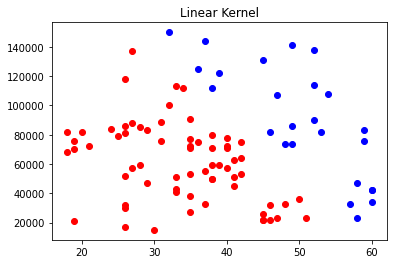

In [14]:
#Plot points according to predicted values of linear kernel
y_pre = model_lin.predict(X_test_scaled)
class_0_pre = X_test[y_pre==0]
class_1_pre = X_test[y_pre==1]
plt.scatter(class_0_pre['Age'],class_0_pre['EstimatedSalary'],c='red')
plt.scatter(class_1_pre['Age'],class_1_pre['EstimatedSalary'],c='blue')
plt.title('Linear Kernel')

Text(0.5, 1.0, 'Polynomial Kernel')

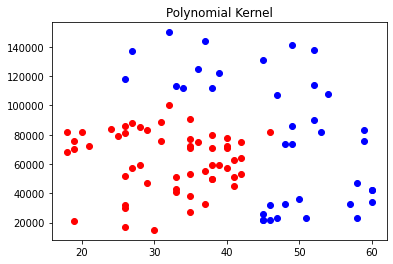

In [15]:
#Plot points according to predicted values of polynomial kernel
y_pre = model_poly.predict(X_test_scaled)
class_0_pre = X_test[y_pre==0]
class_1_pre = X_test[y_pre==1]
plt.scatter(class_0_pre['Age'],class_0_pre['EstimatedSalary'],c='red')
plt.scatter(class_1_pre['Age'],class_1_pre['EstimatedSalary'],c='blue')
plt.title('Polynomial Kernel')

Text(0.5, 1.0, 'RBF Kernel')

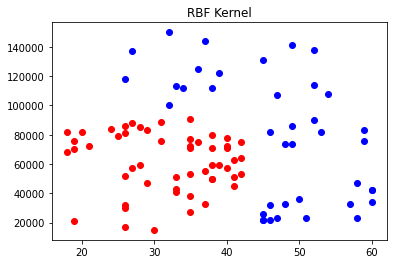

In [16]:
#Plot points according to predicted values of rbf kernel
y_pre = model_rbf.predict(X_test_scaled)
class_0_pre = X_test[y_pre==0]
class_1_pre = X_test[y_pre==1]
plt.scatter(class_0_pre['Age'],class_0_pre['EstimatedSalary'],c='red')
plt.scatter(class_1_pre['Age'],class_1_pre['EstimatedSalary'],c='blue')
plt.title('RBF Kernel')

In [17]:
import numpy as np

In [18]:
plot_data = []
for x in range(0,100,1):
    for y in range(0,100,1):
        plot_data.append([x,y])
plot_data=np.array(plot_data)/100

In [19]:
plot_data

array([[0.  , 0.  ],
       [0.  , 0.01],
       [0.  , 0.02],
       ...,
       [0.99, 0.97],
       [0.99, 0.98],
       [0.99, 0.99]])

In [20]:
plot_data.shape

(10000, 2)

Text(0.5, 1.0, 'Linear Kernel')

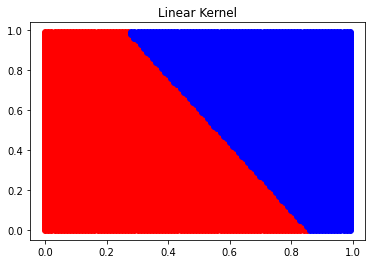

In [21]:
y_plot = model_lin.predict(plot_data)
class_0 = plot_data[y_plot==0]
class_1 = plot_data[y_plot==1]
plt.scatter(class_0[:,0],class_0[:,1],c='red')
plt.scatter(class_1[:,0],class_1[:,1],c='blue')
plt.title('Linear Kernel')

Text(0.5, 1.0, 'Poly Kernel')

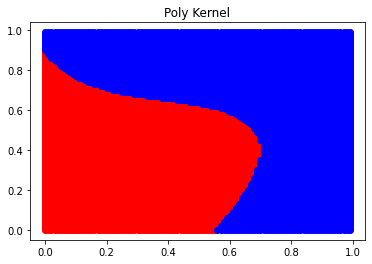

In [22]:
y_plot = model_poly.predict(plot_data)
class_0 = plot_data[y_plot==0]
class_1 = plot_data[y_plot==1]
plt.scatter(class_0[:,0],class_0[:,1],c='red')
plt.scatter(class_1[:,0],class_1[:,1],c='blue')
plt.title('Poly Kernel')

Text(0.5, 1.0, 'rbf Kernel')

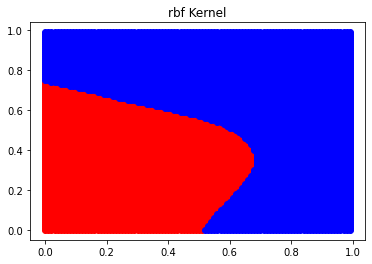

In [23]:
y_plot = model_rbf.predict(plot_data)
class_0 = plot_data[y_plot==0]
class_1 = plot_data[y_plot==1]
plt.scatter(class_0[:,0],class_0[:,1],c='red')
plt.scatter(class_1[:,0],class_1[:,1],c='blue')
plt.title('rbf Kernel')

In [24]:
pts = np.array([[25,60000],[50,120000]])
pts_scaled = scaler.transform(pts)

In [25]:
pts_scaled

array([[0.16666667, 0.33333333],
       [0.76190476, 0.77777778]])

In [26]:
y = model_rbf.predict(pts_scaled)
y

array([0, 1], dtype=int64)